<a href="https://www.kaggle.com/code/hajarhanifah/linear-regression-student-scores-hajar-hanifah?scriptVersionId=90539311" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-scores/student_scores.csv


***
# ***Overview***
***

In this notebook assignment, we are going to explore the effect of study time on grades, we will use student score dataset, preprocess it, and apply Linear Regression model to see the constanta and coefficient, and regression analysis.

***
# **Libraries and Settings**
***

Import needed common libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

***
# ***Data Load***
***

# Data Exploration

In [3]:
dataset = pd.read_csv('../input/student-scores/student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print(dataset.shape)

(25, 2)


This means that our dataset has 25 rows and 2 columns

# Statistical Dataset

In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Display Data

In [6]:
display(dataset.info())
display(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


None

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Constanta and Coefficient

In [7]:
X = dataset['Hours'].values
Y = dataset['Scores'].values

In [8]:
#Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

#Total number of values
total_values = len(X)

#using formula to calculate B1 and B2
# coefficient (b0) 
# constanta (b1)
numeric = 0
denom = 0 

for i in range(total_values):
    numeric += (X[i]- mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x)** 2
    
b1 = numeric/denom
b0 = mean_y -(b1 * mean_x)
print(b0,b1)

2.4836734053731746 9.775803390787475


# 2D-Graph

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0 , 10.0)

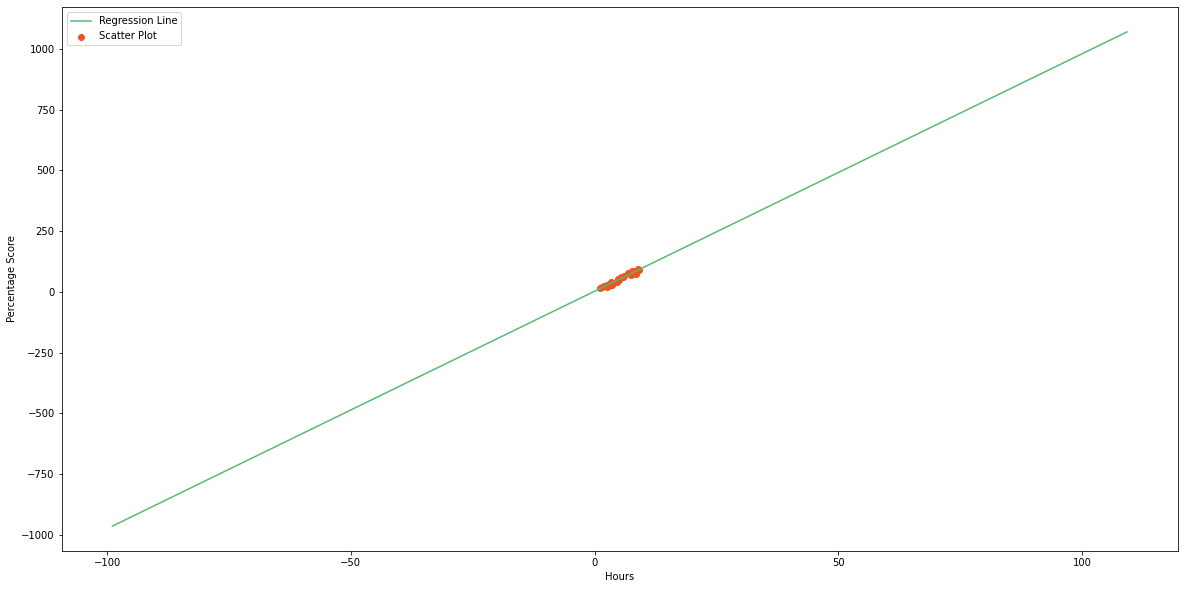

In [10]:
#ploting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100

#calculating line values x and y
x = np.linspace(min_x, max_x, 100)
y = b0+b1*x

#ploting line
plt.plot(x,y, color='#58b970', label = 'Regression Line')

#ploting scatters points
plt.scatter(X,Y, c='#ef5423' , label ='Scatter Plot')

plt.xlabel('Hours')
plt.ylabel('Percentage Score')
plt.legend()
plt.show()

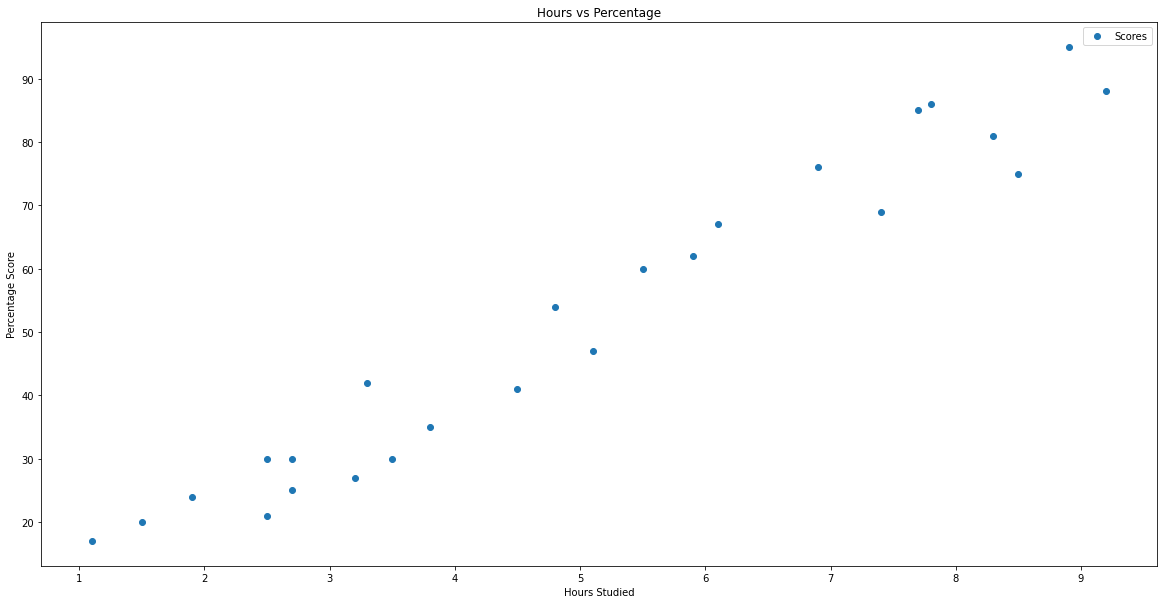

In [11]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

**R square**

In [12]:
realitation = 0
prediction = 0
for i in range(total_values):
    y_pred = b0 + b1 * X[i]
    realitation += (Y[i] - mean_y) **2 
    prediction *= (Y[i] - y_pred) **2
r2 = 1-(prediction/realitation)
print(r2)

1.0


the length of study time contributes 100% in increasing student scores